<a href="https://colab.research.google.com/github/Jaysons-s/DataSctructures/blob/main/Arbol_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
5 (red) 10 (black) 15 (red) 20 (black) 25 (red) 30 (black) 


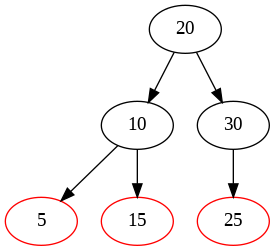

In [4]:
!apt-get install graphviz -y
!pip install graphviz

import graphviz

class Node:
    def __init__(self, data, color='red'):
        self.data = data
        self.color = color  # 'red' or 'black'
        self.left = None
        self.right = None
        self.parent = None


class RedBlackTree:
    def __init__(self):
        self.NIL_LEAF = Node(data=None, color='black')
        self.root = self.NIL_LEAF

    def insert(self, data):
        new_node = Node(data)
        new_node.left = self.NIL_LEAF
        new_node.right = self.NIL_LEAF

        parent = None
        current = self.root

        while current != self.NIL_LEAF:
            parent = current
            if new_node.data < current.data:
                current = current.left
            else:
                current = current.right

        new_node.parent = parent

        if parent is None:
            self.root = new_node
        elif new_node.data < parent.data:
            parent.left = new_node
        else:
            parent.right = new_node

        new_node.color = 'red'
        self.fix_insert(new_node)

    def fix_insert(self, node):
        while node != self.root and node.parent.color == 'red':
            if node.parent == node.parent.parent.left:
                uncle = node.parent.parent.right
                if uncle.color == 'red':
                    node.parent.color = 'black'
                    uncle.color = 'black'
                    node.parent.parent.color = 'red'
                    node = node.parent.parent
                else:
                    if node == node.parent.right:
                        node = node.parent
                        self.left_rotate(node)
                    node.parent.color = 'black'
                    node.parent.parent.color = 'red'
                    self.right_rotate(node.parent.parent)
            else:
                uncle = node.parent.parent.left
                if uncle.color == 'red':
                    node.parent.color = 'black'
                    uncle.color = 'black'
                    node.parent.parent.color = 'red'
                    node = node.parent.parent
                else:
                    if node == node.parent.left:
                        node = node.parent
                        self.right_rotate(node)
                    node.parent.color = 'black'
                    node.parent.parent.color = 'red'
                    self.left_rotate(node.parent.parent)
        self.root.color = 'black'

    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.NIL_LEAF:
            y.left.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def right_rotate(self, y):
        x = y.left
        y.left = x.right
        if x.right != self.NIL_LEAF:
            x.right.parent = y
        x.parent = y.parent
        if y.parent is None:
            self.root = x
        elif y == y.parent.right:
            y.parent.right = x
        else:
            y.parent.left = x
        x.right = y
        y.parent = x

    def search(self, data):
        current = self.root
        while current != self.NIL_LEAF:
            if data == current.data:
                return current
            elif data < current.data:
                current = current.left
            else:
                current = current.right
        return None

    def inorder(self, node):
        if node != self.NIL_LEAF:
            self.inorder(node.left)
            print(f"{node.data} ({node.color})", end=" ")
            self.inorder(node.right)

    def print_tree(self):
        self.inorder(self.root)
        print()

    def generate_graph(self, node, dot=None):
        if dot is None:
            dot = graphviz.Digraph()
            dot.node(str(node.data), str(node.data), color=node.color)

        if node.left and node.left != self.NIL_LEAF:
            dot.node(str(node.left.data), str(node.left.data), color=node.left.color)
            dot.edge(str(node.data), str(node.left.data))
            self.generate_graph(node.left, dot)

        if node.right and node.right != self.NIL_LEAF:
            dot.node(str(node.right.data), str(node.right.data), color=node.right.color)
            dot.edge(str(node.data), str(node.right.data))
            self.generate_graph(node.right, dot)

        return dot

# Ejemplo de uso
if __name__ == "__main__":
    rbt = RedBlackTree()
    numbers = [10, 20, 30, 15, 25, 5]

    for number in numbers:
        rbt.insert(number)

    rbt.print_tree()

    # Generar el gráfico y guardarlo como PNG
    dot = rbt.generate_graph(rbt.root)
    dot.render("arbol_rojo_negro", format="png", cleanup=True)  # Cambia a False si deseas conservar el archivo .dot

    # Mostrar la imagen (si estás en un entorno que lo permita)
    from IPython.display import Image
    display(Image(filename='arbol_rojo_negro.png'))
